# Work timepending variable, using two weeks of data
(08/25/23-09/07/23), code reference: 11/28/23
### Separately created master_finalized_txns_limited.csv 
### from master_finalized_txns.csv.gz (which Tara created)
(status in (confirmed, failed))
### Remove rows where timepending is missing, or timepending = 0
### Find best distribution for timepending
NEW 11/16/23: going through the distributions 10 at a time.
### Kept from earlier: Generate summary statistics, histogram for timepending


In [1]:
#install fitter package
#pip install fitter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
import scipy

#package for analysis of distribution fit
from fitter import Fitter, get_common_distributions, get_distributions

import gzip

In [2]:
from pathlib import Path

# Data folder location

###data_folder = ADD FILE LOCATION HERE

#read in TWO WEEK, trimmed and finalized, LIMITED mempool data set

limited_df = data_folder/'master_finalized_txns_limited.csv'
df = pd.read_csv(limited_df)


df = df.loc[: , ['basefeepergas', 'maxpriorityfeepergas', 'maxfeepergas', 'timepending', 'blockspending']]
df.shape



(10505807, 5)

## Remove rows where timepending is missing, or where timepending = 0 
### (only zero for private transactions that would not show up in mempool)

In [3]:
#Remove rows where timepending is 0, or is Nan
df2 = df.dropna( how = 'all', subset=['timepending'])
df2.shape

df3 = df2[df2.timepending != 0].copy()

#convert to seconds (timepending is in milliseconds)
df3['timepending_'] = df3['timepending']/1000

df3.shape

(10176150, 6)

In [4]:
del df
del df2
del limited_df

## New variable: log of timepending

In [5]:
##data['natural_log'] = np.log(data['Salary'])
df3['logtimepending'] = np.log(df3['timepending'])

In [7]:
df3.head()

,basefeepergas,maxpriorityfeepergas,maxfeepergas,timepending,blockspending,timepending_,logtimepending
0,1.360266e+10,2.000000e+09,2.400000e+10,7565.0,1.0,7.565,8.931288
1,1.360266e+10,1.500000e+09,2.885092e+10,3625.0,1.0,3.625,8.195610
2,1.360266e+10,2.000000e+09,2.400000e+10,9400.0,1.0,9.400,9.148465
3,1.360266e+10,2.000000e+09,2.400000e+10,9440.0,1.0,9.440,9.152711
4,1.360266e+10,2.000000e+09,2.400000e+10,7544.0,1.0,7.544,8.928508


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10176150 entries, 0 to 10505806
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   basefeepergas         float64
 1   maxpriorityfeepergas  float64
 2   maxfeepergas          float64
 3   timepending           float64
 4   blockspending         float64
 5   timepending_          float64
 6   logtimepending        float64
dtypes: float64(7)
memory usage: 621.1 MB


In [8]:
df3.timepending.describe()

count    1.017615e+07
mean     3.484537e+05
std      5.428736e+07
min      1.000000e+00
25%      5.176000e+03
50%      8.460000e+03
75%      1.133600e+04
max      1.554235e+10
Name: timepending, dtype: float64

In [6]:
#find 99th percentile for timepending
#(NOTE: percentile function was not working before with timepending: rows with missing timepending had not been removed)
#np.nanpercentile(df3['timepending'], 99)

x = np.percentile(df3['timepending'], 99)
x

252917.54999999888

# Starting here: following steps described on medium.com

https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

## **Plot histogram (timepending)

C:\Users\Checkout\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


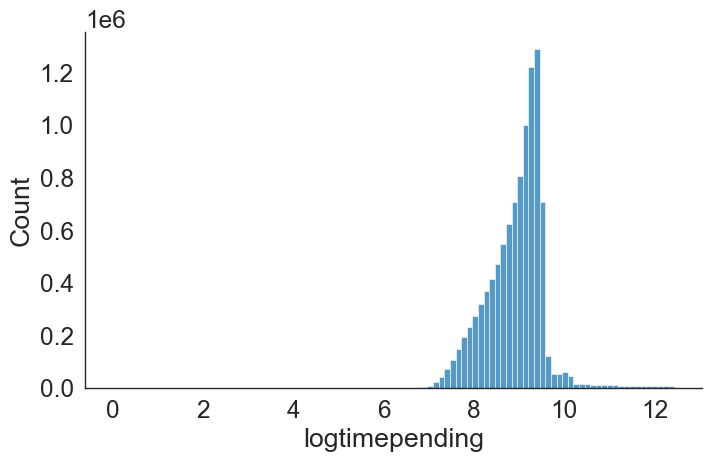

In [10]:
#Plot histogram
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
#sns.displot(data=df3, x="timepending", kind="hist", bins = 100, aspect = 1.5)
sns.displot(data=df3[df3['timepending']<x], x="logtimepending", kind="hist", bins = 100, aspect = 1.5)

## **Data preparation (timepending and logtimepending)

In [7]:
#convert to a numpy array
##height = dataset["Height"].values

timepending = df3["timepending"].values
logtimepending = df3["logtimepending"].values


## **Fitting distributions  (timepending)

Use trick from here: https://fitter.readthedocs.io/en/latest/references.html
limit to 10 distributions at a time
These are the distributions that actually run below: expon

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
_fit was not fitted. no parameters available
argus was not fitted. no parameters available
arcsine was not fitted. no parameters available
burr was not fitted. no parameters available
beta was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
_fit,inf,inf,inf,inf,NaN,NaN
argus,inf,inf,inf,inf,NaN,NaN
arcsine,inf,inf,inf,inf,NaN,NaN
burr,inf,inf,inf,inf,NaN,NaN
beta,inf,inf,inf,inf,NaN,NaN


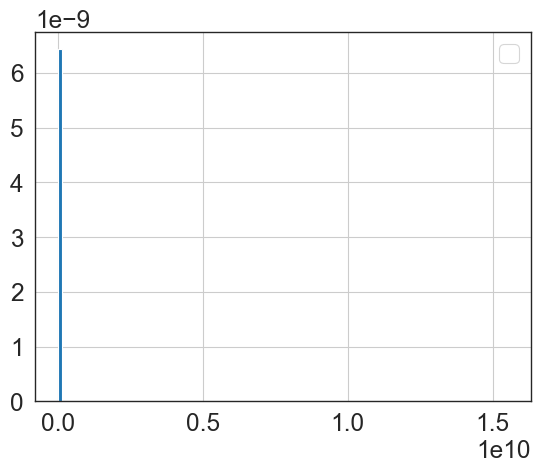

In [12]:
## First 9 distributions
f = Fitter(timepending)
f.distributions = f.distributions[0:10]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED cauchy distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED exponnorm distribution (taking more than 30 seconds)
chi2 was not fitted. no parameters available
dgamma was not fitted. no parameters available
erlang was not fitted. no parameters available
cosine was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,4.139276e-17,4.462946e+06,4.462974e+06,0.000049,0.906852,0.0
chi2,inf,inf,inf,inf,NaN,NaN
dgamma,inf,inf,inf,inf,NaN,NaN
erlang,inf,inf,inf,inf,NaN,NaN
cosine,inf,inf,inf,inf,NaN,NaN


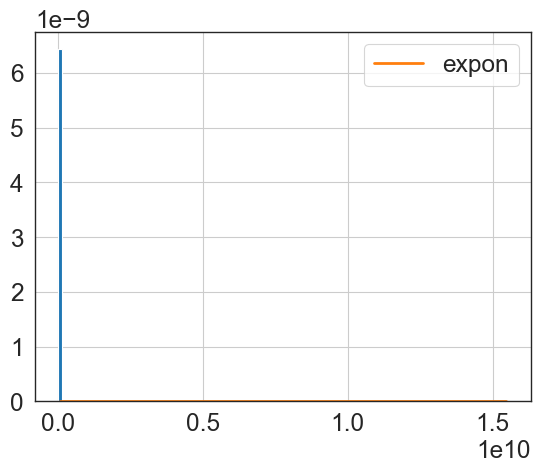

In [13]:
## Next 10 distributions
f = Fitter(timepending)
f.distributions = f.distributions[10:20]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED foldcauchy distribution (taking more than 30 seconds)
SKIPPED fatiguelife distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED f distribution (taking more than 30 seconds)
SKIPPED foldnorm distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
exponpow was not fitted. no parameters available
gamma was not fitted. no parameters available
fisk was not fitted. no parameters available
foldcauchy was not fitted. no parameters available
fatiguelife was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,inf,inf,inf,inf,NaN,NaN
gamma,inf,inf,inf,inf,NaN,NaN
fisk,inf,inf,inf,inf,NaN,NaN
foldcauchy,inf,inf,inf,inf,NaN,NaN
fatiguelife,inf,inf,inf,inf,NaN,NaN


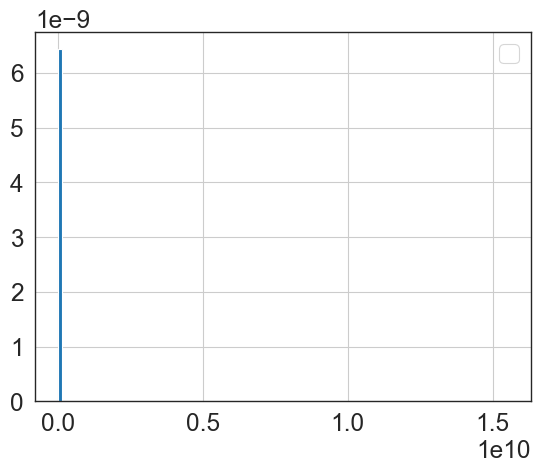

In [14]:
## Next 10 distributions
f = Fitter(timepending)
f.distributions = f.distributions[20:30]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

In [ ]:
## Next 10 distributions
f = Fitter(timepending)
f.distributions = f.distributions[30:40]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED gennorm distribution (taking more than 30 seconds)
SKIPPED genhyperbolic distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED geninvgauss distribution (taking more than 30 seconds)
SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED genlogistic distribution (taking more than 30 seconds)
SKIPPED gibrat distribution (taking more than 30 seconds)
SKIPPED gompertz distribution (taking more than 30 seconds)
gennorm was not fitted. no parameters available
genhyperbolic was not fitted. no parameters available
gengamma was not fitted. no parameters available
genextreme was not fitted. no parameters available
geninvgauss was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,inf,inf,inf,inf,NaN,NaN
genhyperbolic,inf,inf,inf,inf,NaN,NaN
gengamma,inf,inf,inf,inf,NaN,NaN
genextreme,inf,inf,inf,inf,NaN,NaN
geninvgauss,inf,inf,inf,inf,NaN,NaN


Error in callback <function _draw_all_if_interactive at 0x00000166F88F8EA0> (for post_execute):



KeyboardInterrupt



SKIPPED halfnorm distribution (taking more than 30 seconds)
SKIPPED halfcauchy distribution (taking more than 30 seconds)
SKIPPED gumbel_r distribution (taking more than 30 seconds)
SKIPPED halfgennorm distribution (taking more than 30 seconds)
SKIPPED gumbel_l distribution (taking more than 30 seconds)
SKIPPED invgamma distribution (taking more than 30 seconds)
SKIPPED halflogistic distribution (taking more than 30 seconds)
SKIPPED hypsecant distribution (taking more than 30 seconds)
SKIPPED invgauss distribution (taking more than 30 seconds)
SKIPPED invweibull distribution (taking more than 30 seconds)
halfnorm was not fitted. no parameters available
halfcauchy was not fitted. no parameters available
gumbel_r was not fitted. no parameters available
halfgennorm was not fitted. no parameters available
gumbel_l was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
halfnorm,inf,inf,inf,inf,NaN,NaN
halfcauchy,inf,inf,inf,inf,NaN,NaN
gumbel_r,inf,inf,inf,inf,NaN,NaN
halfgennorm,inf,inf,inf,inf,NaN,NaN
gumbel_l,inf,inf,inf,inf,NaN,NaN


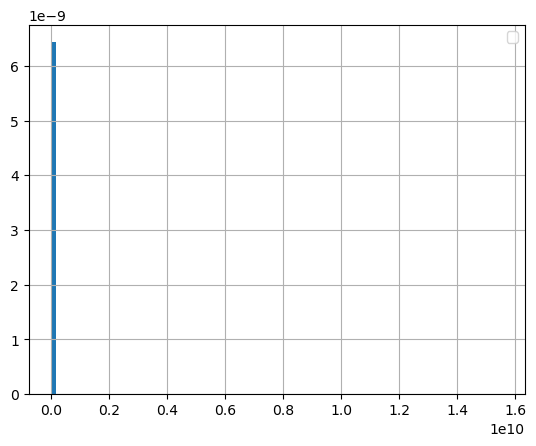

In [12]:
## Next 10 distributions
f = Fitter(timepending)
f.distributions = f.distributions[40:50]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED ksone distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED kappa3 distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED kstwobign distribution (taking more than 30 seconds)
SKIPPED laplace_asymmetric distribution (taking more than 30 seconds)
SKIPPED levy distribution (taking more than 30 seconds)
kstwo was not fitted. no parameters available
johnsonsu was not fitted. no parameters available
ksone was not fitted. no parameters available
johnsonsb was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,4.139276e-17,inf,inf,0.000049,0.48901,0.0
kstwo,inf,inf,inf,inf,NaN,NaN
johnsonsu,inf,inf,inf,inf,NaN,NaN
ksone,inf,inf,inf,inf,NaN,NaN
johnsonsb,inf,inf,inf,inf,NaN,NaN


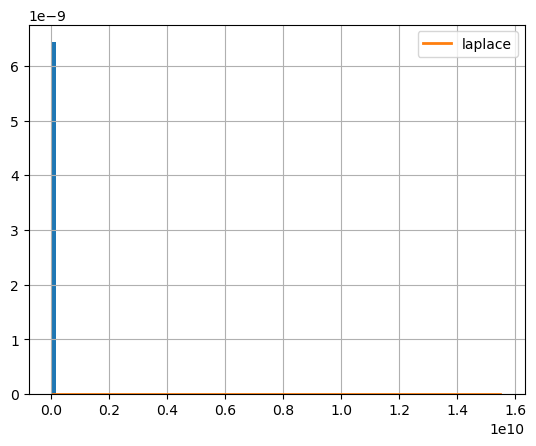

In [13]:
## Next 10 distributions
f = Fitter(timepending)
f.distributions = f.distributions[50:60]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED loglaplace distribution (taking more than 30 seconds)
SKIPPED loggamma distribution (taking more than 30 seconds)
SKIPPED logistic distribution (taking more than 30 seconds)
SKIPPED levy_l distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED lomax distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED maxwell distribution (taking more than 30 seconds)
SKIPPED mielke distribution (taking more than 30 seconds)
loglaplace was not fitted. no parameters available
loggamma was not fitted. no parameters available
logistic was not fitted. no parameters available
levy_l was not fitted. no parameters available
loguniform was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
loglaplace,inf,inf,inf,inf,NaN,NaN
loggamma,inf,inf,inf,inf,NaN,NaN
logistic,inf,inf,inf,inf,NaN,NaN
levy_l,inf,inf,inf,inf,NaN,NaN
loguniform,inf,inf,inf,inf,NaN,NaN


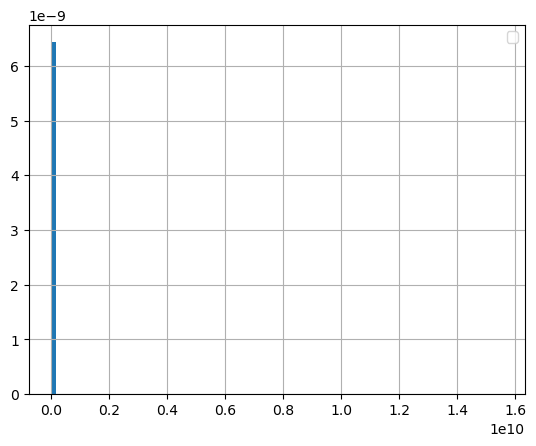

In [14]:
## Next 10 distributions
f = Fitter(timepending)
f.distributions = f.distributions[60:70]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED pareto distribution (taking more than 30 seconds)
SKIPPED moyal distribution (taking more than 30 seconds)
SKIPPED nakagami distribution (taking more than 30 seconds)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED norminvgauss distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
nct was not fitted. no parameters available
ncx2 was not fitted. no parameters available
pareto was not fitted. no parameters available
moyal was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.422517e-17,2.735711e+06,2.735739e+06,inf,0.497439,0.0
nct,inf,inf,inf,inf,NaN,NaN
ncx2,inf,inf,inf,inf,NaN,NaN
pareto,inf,inf,inf,inf,NaN,NaN
moyal,inf,inf,inf,inf,NaN,NaN


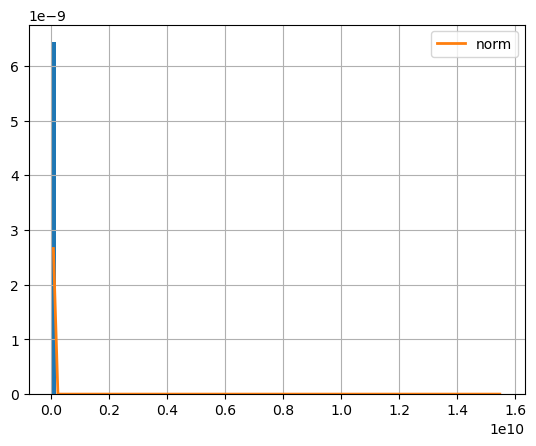

In [15]:
## Next 10 distributions
f = Fitter(timepending)
f.distributions = f.distributions[70:80]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

In [ ]:
# Next 10 distributions
f = Fitter(timepending)
f.distributions = f.distributions[80:90]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED rdist distribution (taking more than 30 seconds)
SKIPPED rice distribution (taking more than 30 seconds)
SKIPPED powerlognorm distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rayleigh distribution (taking more than 30 seconds)
SKIPPED powernorm distribution (taking more than 30 seconds)
SKIPPED rel_breitwigner distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
rdist was not fitted. no parameters available
rice was not fitted. no parameters available
powerlognorm was not fitted. no parameters available
rv_continuous was not fitted. no parameters available
rayleigh was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rdist,inf,inf,inf,inf,NaN,NaN
rice,inf,inf,inf,inf,NaN,NaN
powerlognorm,inf,inf,inf,inf,NaN,NaN
rv_continuous,inf,inf,inf,inf,NaN,NaN
rayleigh,inf,inf,inf,inf,NaN,NaN


Error in callback <function _draw_all_if_interactive at 0x000001E0A0C94FE0> (for post_execute):


KeyboardInterrupt: 

SKIPPED t distribution (taking more than 30 seconds)
SKIPPED trapezoid distribution (taking more than 30 seconds)
SKIPPED skewcauchy distribution (taking more than 30 seconds)
C:\Users\Checkout\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED skewnorm distribution (taking more than 30 seconds)
SKIPPED semicircular distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED triang dist

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
t,inf,inf,inf,inf,NaN,NaN
trapezoid,inf,inf,inf,inf,NaN,NaN
skewcauchy,inf,inf,inf,inf,NaN,NaN
skewnorm,inf,inf,inf,inf,NaN,NaN
semicircular,inf,inf,inf,inf,NaN,NaN


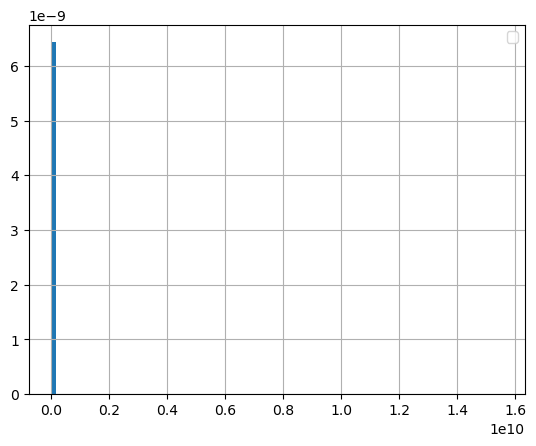

In [8]:
# Next 10 distributions
f = Fitter(timepending)
f.distributions = f.distributions[90:100]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

In [9]:
del f

SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED truncpareto distribution (taking more than 30 seconds)
SKIPPED truncweibull_min distribution (taking more than 30 seconds)
SKIPPED tukeylambda distribution (taking more than 30 seconds)
SKIPPED wald distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
SKIPPED weibull_max distribution (taking more than 30 seconds)
SKIPPED weibull_min distribution (taking more than 30 seconds)
SKIPPED wrapcauchy distribution (taking more than 30 seconds)
vonmises_fisher was not fitted. no parameters available
truncpareto was not fitted. no parameters available
truncweibull_min was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,4.097879e-17,4697.366854,4725.637969,inf,9.976332e-01,0.0
vonmises,2.533050e+00,373.574647,415.981319,inf,2.473642e+09,0.0
vonmises_fisher,inf,inf,inf,inf,NaN,NaN
truncpareto,inf,inf,inf,inf,NaN,NaN
truncweibull_min,inf,inf,inf,inf,NaN,NaN


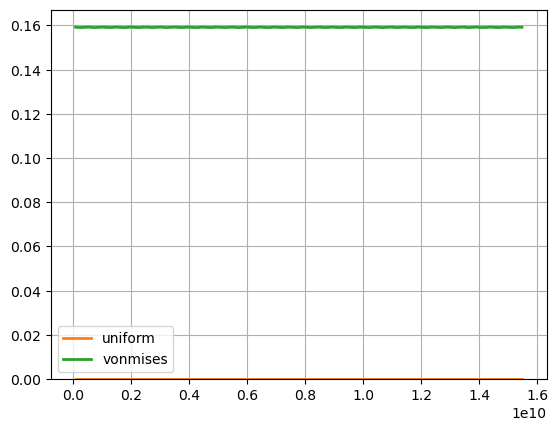

In [10]:
## Next 10 distributions
f = Fitter(timepending)
f.distributions = f.distributions[100:111]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

## There 5 distributions that were successfully fitted. 
## Below: looking at these

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.422517e-17,2.735711e+06,2.735739e+06,inf,4.974393e-01,0.0
uniform,4.097879e-17,4.697367e+03,4.725638e+03,inf,9.976332e-01,0.0
expon,4.139276e-17,4.462946e+06,4.462974e+06,0.000049,9.068525e-01,0.0
laplace,4.139276e-17,inf,inf,0.000049,4.890100e-01,0.0
vonmises,2.533050e+00,3.735746e+02,4.159813e+02,inf,2.473642e+09,0.0


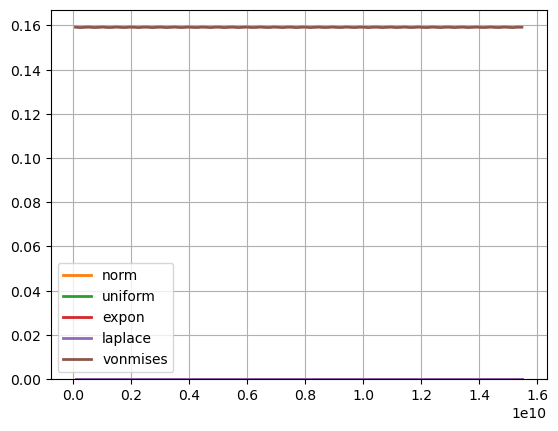

In [13]:
del f

f = Fitter(timepending, timeout = 120)
f.distributions =   ['laplace'] + ['norm'] + ['vonmises'] + ['expon'] + ['uniform']
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

In [14]:
f.get_best()

{'norm': {'loc': 348453.71025761217, 'scale': 54287357.50883754}}